# Olympic Gold Medal Analysis 
![Image of olympic athlete with microphone and signs around](logo.png)

### Data Sources
* [Olympic Host Data](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_hosts.csv)
* [Olympic Medal Data](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_medals.csv)

In [21]:
!pip install prophet
import pandas as pd
import matplotlib.pyplot as plt 

In [22]:
# Read in CSV files for retail, olympic host, and olympic medals data
olympic_host_data = pd.read_csv('olympic_hosts.csv')
olympic_medals_data = pd.read_csv('olympic_analysis.csv')

display(olympic_host_data.head())
display(olympic_medals_data.head())

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [23]:
# Rename game_year column to year
olympic_host_data = olympic_host_data.rename(columns={'game_year' : 'year'})

In [24]:
# Slice each dataframe to get Summer data only (game_season & edition columns)
olympic_host_data = olympic_host_data[olympic_host_data['game_season'] == 'Summer']
olympic_medals_data = olympic_medals_data[olympic_medals_data['edition'].str.contains('Summer')]

In [25]:
# Merge dataframes on the year column and inner 
olympic_df = pd.merge(olympic_host_data, olympic_medals_data, on='year', how='inner')
olympic_df


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,year,edition,edition_id,country,country_noc,gold,silver,bronze,total
0,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,United States,USA,39,41,33,113
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,People's Republic of China,CHN,38,32,19,89
2,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,Japan,JPN,27,14,17,58
3,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,Great Britain,GBR,22,20,22,64
4,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,ROC,ROC,20,28,23,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Austria,AUT,2,1,2,5
1339,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Australia,AUS,2,0,0,2
1340,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Denmark,DEN,1,2,3,6
1341,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Switzerland,SUI,1,2,0,3


In [26]:
# Create a dataframe with medals with countries results that hold the olympics
output_df = olympic_df[olympic_df['game_location'] == olympic_df['country']].groupby(['country', 'year']).sum().reset_index()
output_df['game_end_date'] = pd.to_datetime(output_df['game_end_date'])
output_df = output_df.set_index('game_end_date')
output_df = output_df['gold']
output_df = pd.DataFrame(output_df)
output_df

,gold
game_end_date,
2000-10-01 09:00:00+00:00,16
1920-09-12 19:00:00+00:00,16
2016-08-21 21:00:00+00:00,7
1976-07-31 22:00:00+00:00,0
1952-08-03 07:00:00+00:00,6
1900-10-28 19:50:39+00:00,31
1924-07-27 19:00:00+00:00,14
1936-08-16 19:00:00+00:00,38
1908-10-31 20:09:00+00:00,56


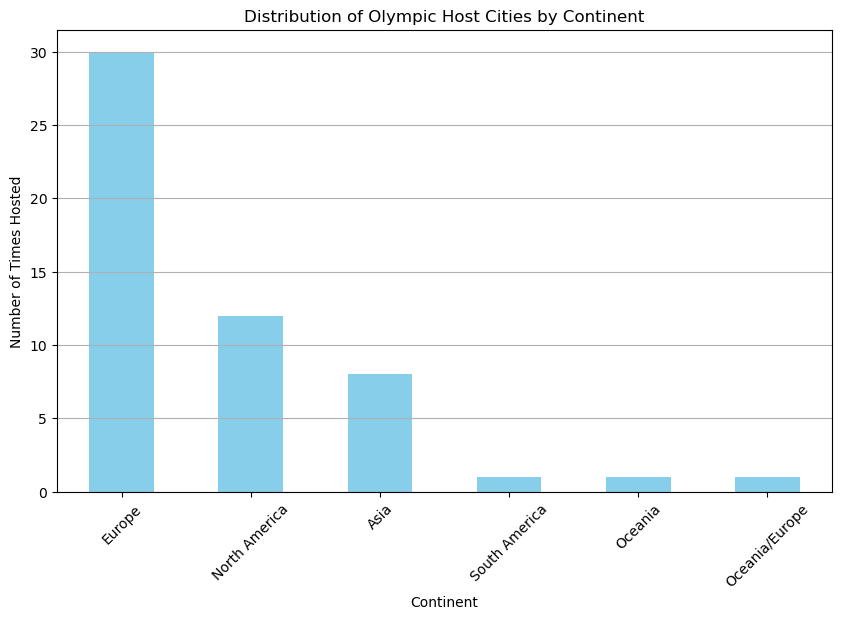

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
olympic_hosts = pd.read_csv('olympic_hosts.csv')

# Define the continent mapping
continent_mapping = {
    'China': 'Asia',
    'Japan': 'Asia',
    'Republic of Korea': 'Asia',
    'Brazil': 'South America',
    'Russian Federation': 'Europe',
    'Great Britain': 'Europe',
    'Canada': 'North America',
    'Italy': 'Europe',
    'Greece': 'Europe',
    'United States': 'North America',
    'Australia': 'Oceania',
    'Norway': 'Europe',
    'Spain': 'Europe',
    'France': 'Europe',
    'Yugoslavia': 'Europe',
    'USSR': 'Europe',
    'Austria': 'Europe',
    'Federal Republic of Germany': 'Europe',
    'Mexico': 'North America',
    'Australia, Sweden': 'Oceania/Europe',
    'Finland': 'Europe',
    'Switzerland': 'Europe',
    'Germany': 'Europe',
    'Netherlands': 'Europe',
    'Belgium': 'Europe',
    'Sweden': 'Europe'
}

# Map the game locations to continents
olympic_hosts['Continent'] = olympic_hosts['game_location'].map(continent_mapping)

# Count the number of times each continent has hosted the Olympics
continent_host_count = olympic_hosts['Continent'].value_counts()

# Plot the distribution of Olympic host cities by continent
plt.figure(figsize=(10, 6))
continent_host_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Olympic Host Cities by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Times Hosted')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



<Figure size 1400x800 with 0 Axes>

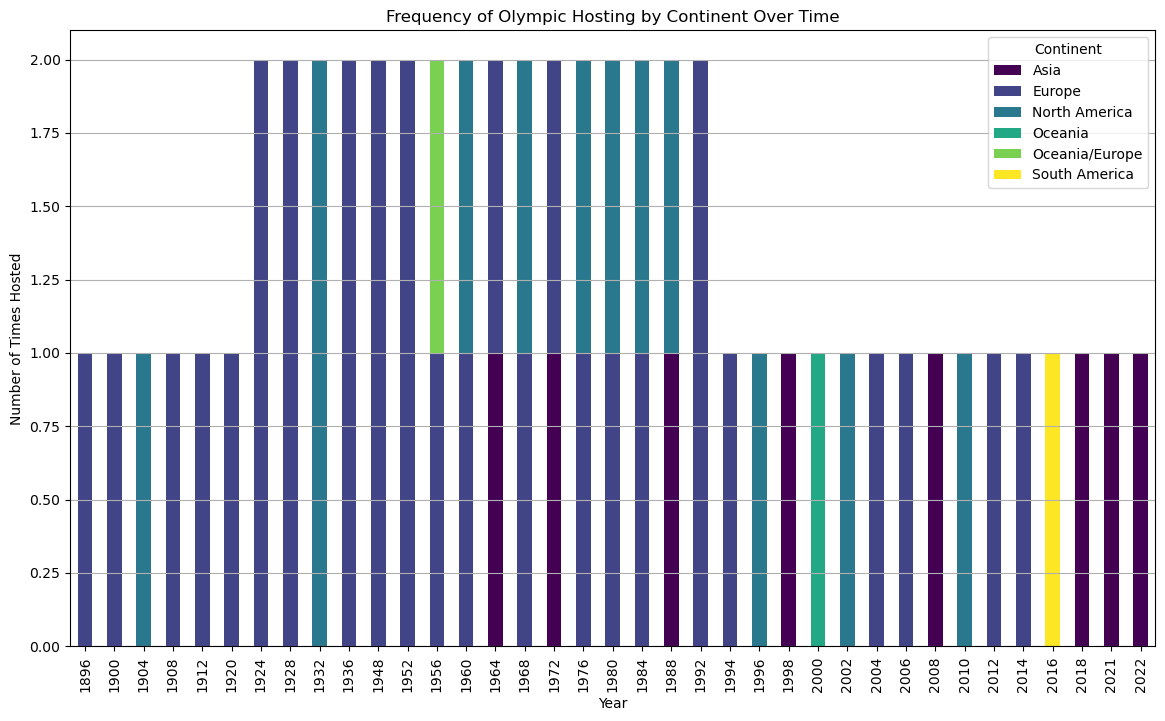

In [31]:
# Extract the year from the game_start_date
olympic_hosts['game_year'] = pd.to_datetime(olympic_hosts['game_start_date']).dt.year

# Group by continent and year to get the hosting frequency over time
continent_year_count = olympic_hosts.groupby(['Continent', 'game_year']).size().unstack().fillna(0)

# Plot the frequency of hosting by different continents over time
plt.figure(figsize=(14, 8))
continent_year_count.T.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Frequency of Olympic Hosting by Continent Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Times Hosted')
plt.legend(title='Continent')
plt.grid(axis='y')
plt.show()


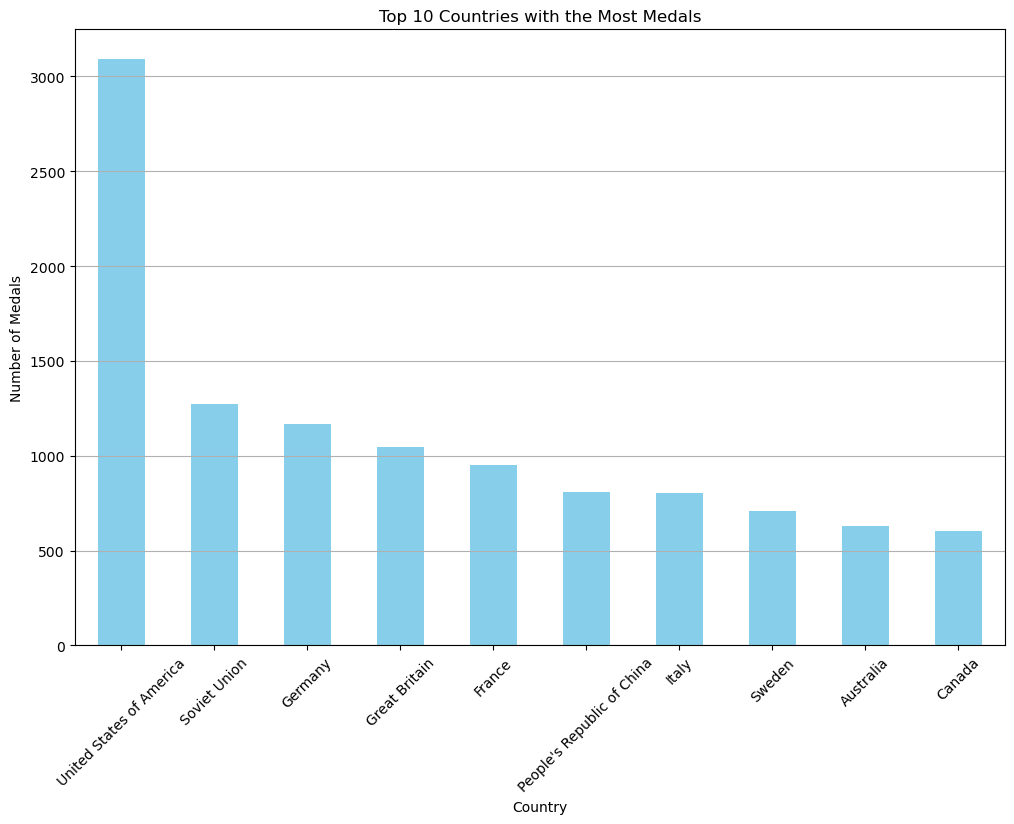

In [32]:
# Load the CSV file
olympic_medals = pd.read_csv('olympic_medals.csv')

# Group by country name and count the number of medals
country_medal_count = olympic_medals['country_name'].value_counts().head(10)

# Plot the top 10 countries with the most medals
plt.figure(figsize=(12, 8))
country_medal_count.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


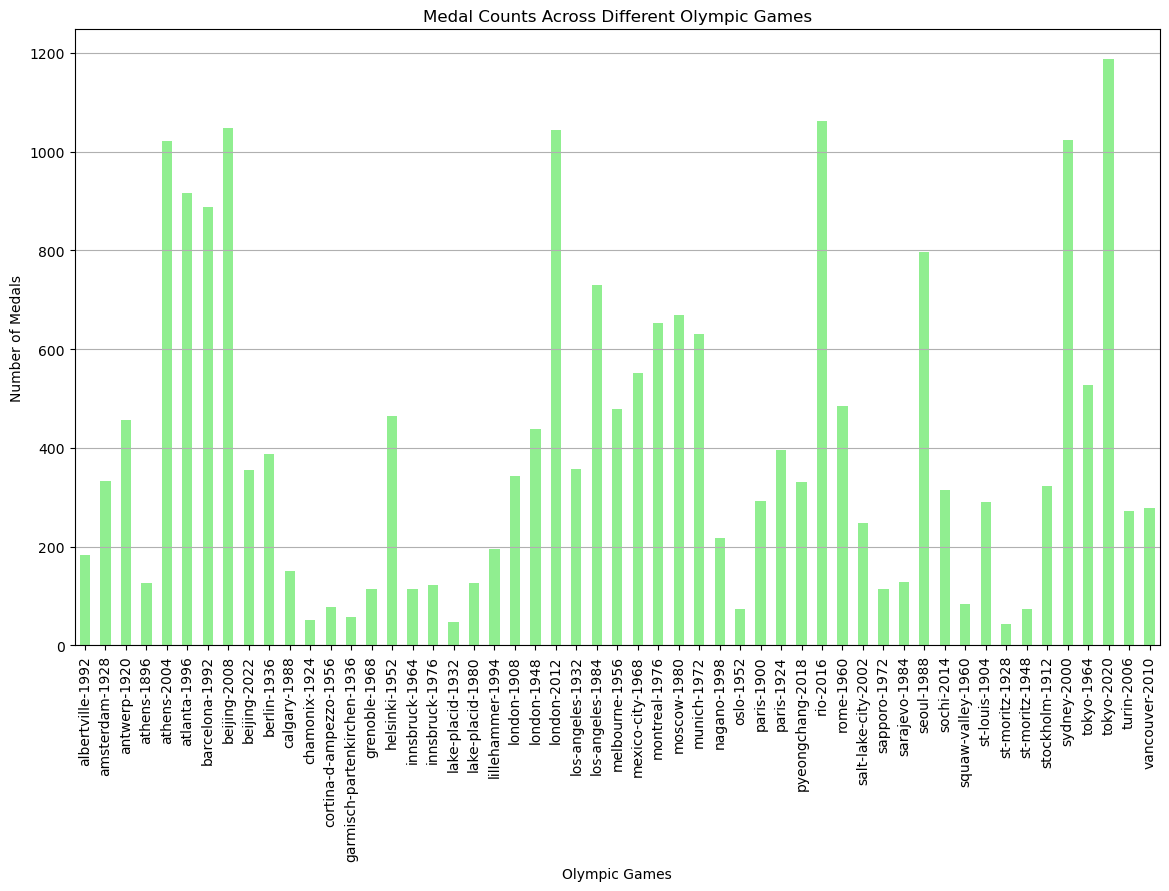

In [33]:
# Group by game (year) and count the number of medals
game_medal_count = olympic_medals['slug_game'].value_counts().sort_index()

# Plot the medal counts across different Olympic Games
plt.figure(figsize=(14, 8))
game_medal_count.plot(kind='bar', color='lightgreen')
plt.title('Medal Counts Across Different Olympic Games')
plt.xlabel('Olympic Games')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


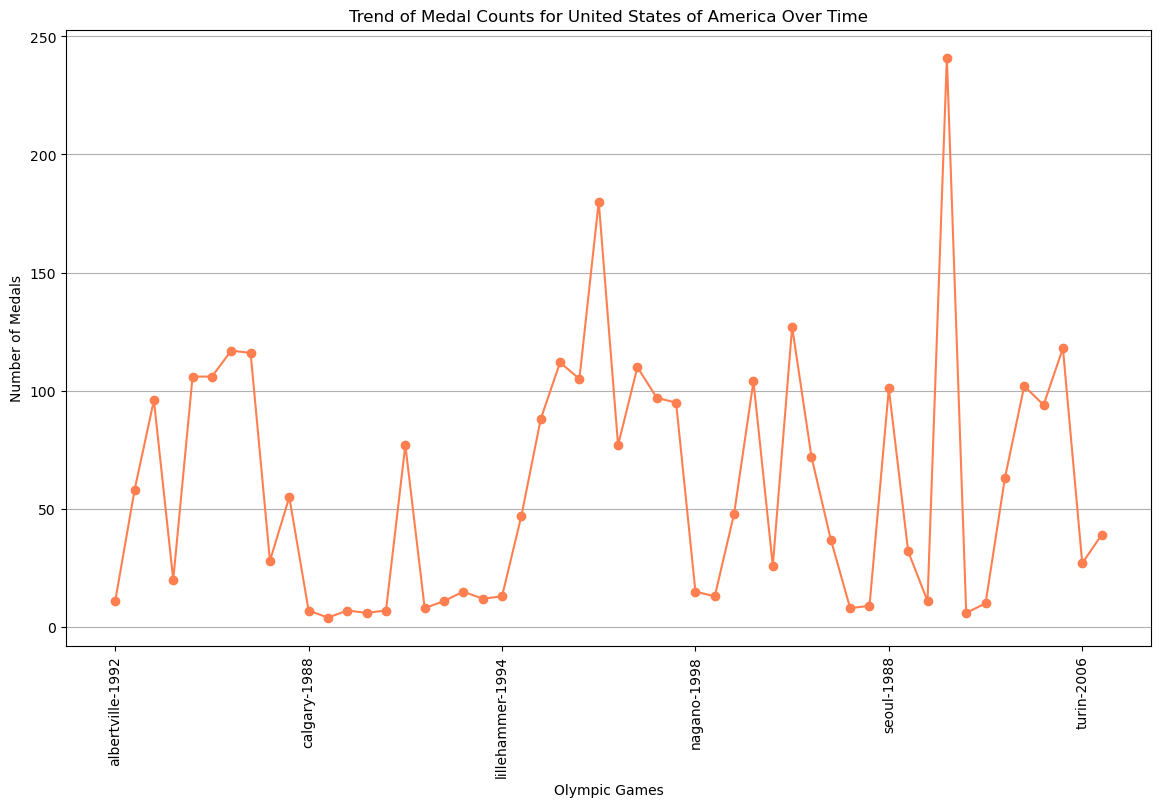

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
olympic_medals = pd.read_csv('olympic_medals.csv')

# Define the correct country name
country = 'United States of America'  # Correct country name as per dataset

# Filter the data for the specific country
country_medals = olympic_medals[olympic_medals['country_name'] == country]

# Group by Olympic Games (slug_game) and count the number of medals for the specific country
country_medal_trend = country_medals['slug_game'].value_counts().sort_index()

# Plot the trend of medal counts for the specific country
plt.figure(figsize=(14, 8))
country_medal_trend.plot(kind='line', marker='o', color='coral')
plt.title(f'Trend of Medal Counts for {country} Over Time')
plt.xlabel('Olympic Games')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()




EXAMPLE:  POPULATION in 2022 and GDP in 2020 as it CORRELATES TO MEDALS

Correlation Matrix:
                  total_medals  population_2022  gdp_2020
total_medals         1.000000         0.010747  0.687264
population_2022      0.010747         1.000000  0.418658
gdp_2020             0.687264         0.418658  1.000000


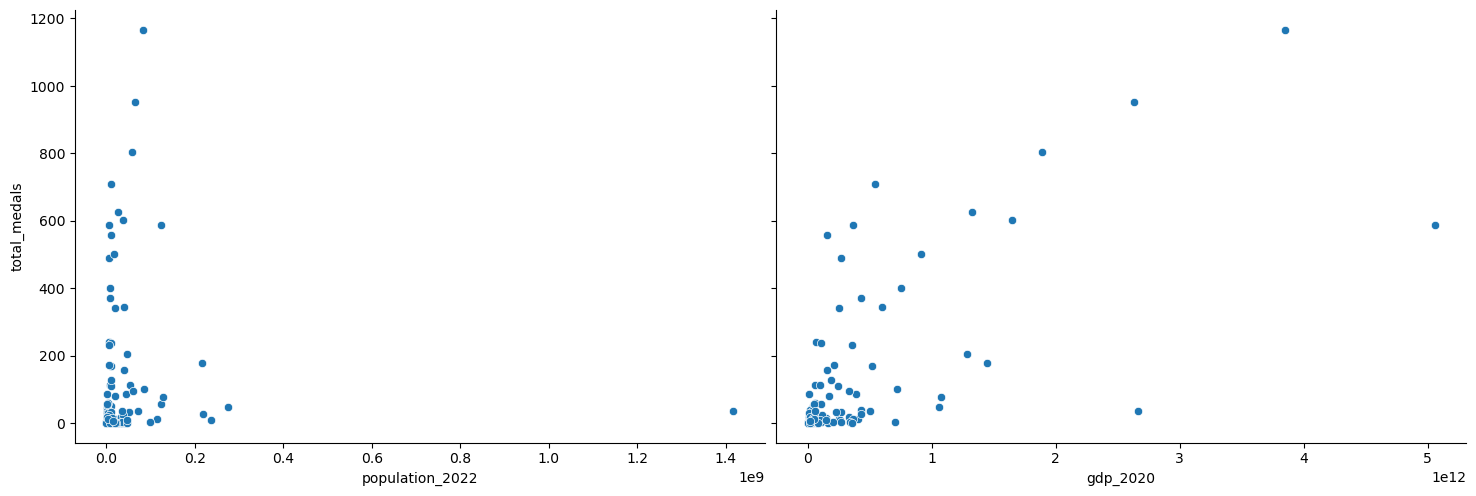

                            OLS Regression Results                            
Dep. Variable:           total_medals   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     72.19
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           8.25e-21
Time:                        20:51:12   Log-Likelihood:                -726.34
No. Observations:                 114   AIC:                             1459.
Df Residuals:                     111   BIC:                             1467.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              48.4172     14.965     

In [35]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Load the datasets
olympic_medals = pd.read_csv('olympic_medals.csv')
world_population = pd.read_csv('world_population.csv')
gdp_data = pd.read_csv('gdp.csv')
olympic_hosts = pd.read_csv('olympic_hosts.csv')

# Rename columns for clarity in Population and GDP data
world_population = world_population.rename(columns={
    'Country/Territory': 'country_name',
    '2022 Population': 'population_2022'
})
gdp_data = gdp_data.rename(columns={'Country Name': 'country_name', '2020': 'gdp_2020'})  # Using GDP data from 2020

# Merge the datasets
combined_data = olympic_medals.merge(world_population, on='country_name', how='left')
combined_data = combined_data.merge(gdp_data[['country_name', 'gdp_2020']], on='country_name', how='left')

# Group by country to get total medals, population, and GDP
country_data = combined_data.groupby('country_name').agg({
    'medal_type': 'count',
    'population_2022': 'first',
    'gdp_2020': 'first'
}).rename(columns={'medal_type': 'total_medals'})

# Drop rows with missing or infinite values
country_data = country_data.replace([np.inf, -np.inf], np.nan).dropna()

# Analyze the correlation between GDP, population, and the number of medals
correlation_matrix = country_data[['total_medals', 'population_2022', 'gdp_2020']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Plot the relationships
sns.pairplot(country_data, x_vars=['population_2022', 'gdp_2020'], y_vars='total_medals', height=5, aspect=1.5)
plt.show()

# Perform regression analysis to see the effect of GDP and population on medal count
X = country_data[['gdp_2020', 'population_2022']]
y = country_data['total_medals']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())

# Analyze Host City Performance

# Convert 'game_year' to string to match 'slug_game'
olympic_hosts['game_year'] = olympic_hosts['game_year'].astype(str)

# Extract host countries and years
hosts = olympic_hosts[['game_year', 'game_location']].drop_duplicates()

# Merge with medals data to identify host performance
host_performance = olympic_medals.merge(hosts, left_on=['slug_game'], right_on=['game_year'], how='left')

# Mark whether the country is a host
host_performance['is_host'] = host_performance['country_name'] == host_performance['game_location']

# Group by country and hosting status
host_vs_non_host = host_performance.groupby(['country_name', 'is_host']).agg({
    'medal_type': 'count'
}).unstack().fillna(0)

# Inspect the structure of the unstacked data
print("Unstacked Data Columns:\n", host_vs_non_host.columns)

# Adjust logic to check for presence of both host and non-host columns
if ('medal_type', True) in host_vs_non_host.columns:
    host_vs_non_host.columns = ['non_host_medal_count' if col[1] == False else 'host_medal_count' for col in host_vs_non_host.columns]
    
    # Calculate the difference in performance
    host_vs_non_host['performance_increase'] = host_vs_non_host['host_medal_count'] - host_vs_non_host['non_host_medal_count']

    # Display the performance comparison
    print("Host vs Non-Host Performance:\n", host_vs_non_host.sort_values(by='performance_increase', ascending=False))

    # Plot the comparison for top countries
    top_host_performance = host_vs_non_host.sort_values(by='performance_increase', ascending=False).head(10)
    top_host_performance[['host_medal_count', 'non_host_medal_count']].plot(kind='bar', stacked=True)
    plt.title('Host vs Non-Host Performance')
    plt.ylabel('Number of Medals')
    plt.show()
else:
    print("No host data available for comparison.")



POPULATION GROWTH RATE & THE IMPACT ON MEDAL COUNT

Correlation between Population Growth Rate and Total Medals:
               total_medals  growth_rate
total_medals      1.000000    -0.283846
growth_rate      -0.283846     1.000000


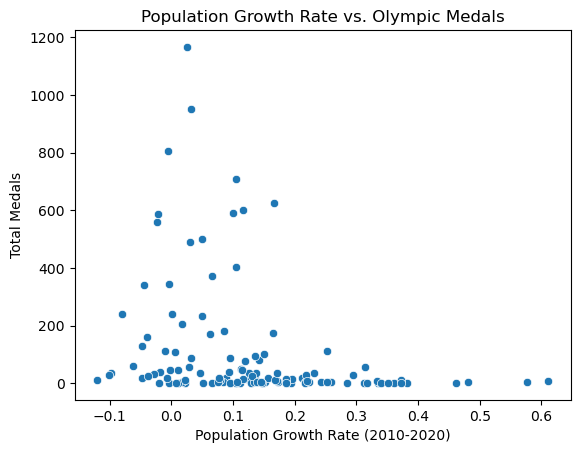

In [39]:
#Geographic and Demographic Insights:

#How does the growth rate of a country's population affect its performance in the Olympics?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Olympic medals and world population data
olympic_medals = pd.read_csv('olympic_medals.csv')
world_population = pd.read_csv('world_population.csv')

import pandas as pd

# Load the world population data
world_population = pd.read_csv('world_population.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Olympic medals and world population data
olympic_medals = pd.read_csv('olympic_medals.csv')
world_population = pd.read_csv('world_population.csv')

# Calculate the population growth rate between 2010 and 2020
world_population['growth_rate'] = (world_population['2020 Population'] - world_population['2010 Population']) / world_population['2010 Population']

# Merge the growth rate data with the Olympic medals data
combined_data = olympic_medals.merge(world_population[['Country/Territory', 'growth_rate']], left_on='country_name', right_on='Country/Territory', how='left')

# Group by country to get total medals and growth rate
growth_medals = combined_data.groupby('country_name').agg({
    'medal_type': 'count',
    'growth_rate': 'first'
}).rename(columns={'medal_type': 'total_medals'})

# Analyze the correlation between growth rate and total medals
correlation = growth_medals[['total_medals', 'growth_rate']].corr()
print("Correlation between Population Growth Rate and Total Medals:\n", correlation)

# Plot the relationship between growth rate and total medals
sns.scatterplot(x='growth_rate', y='total_medals', data=growth_medals)
plt.title('Population Growth Rate vs. Olympic Medals')
plt.xlabel('Population Growth Rate (2010-2020)')
plt.ylabel('Total Medals')
plt.show()





In [48]:
#How do host countries perform in terms of medal counts compared to when they are not hosting?
import pandas as pd
import matplotlib.pyplot as plt

# Load the Olympic medals and hosts data
olympic_medals = pd.read_csv('olympic_medals.csv')
olympic_hosts = pd.read_csv('olympic_hosts.csv')

# Convert 'game_year' to string to match 'slug_game' in olympic_medals
olympic_hosts['game_year'] = olympic_hosts['game_year'].astype(str)

# Merge the hosts data with the medals data to identify host years
host_performance = olympic_medals.merge(olympic_hosts[['game_year', 'game_location']], left_on='slug_game', right_on='game_year', how='left')

# Create a column to mark if the country was hosting in that year
host_performance['is_host'] = host_performance['country_name'] == host_performance['game_location']

# Group by country and hosting status
host_vs_non_host = host_performance.groupby(['country_name', 'is_host']).agg({
    'medal_type': 'count'
}).unstack(fill_value=0).rename(columns={'medal_type': 'medal_count'})

# Debug: Check the structure of the unstacked DataFrame
print("Unstacked DataFrame Structure:\n", host_vs_non_host)

# Check if both hosting and non-hosting columns exist
if ('medal_count', True) in host_vs_non_host.columns and ('medal_count', False) in host_vs_non_host.columns:
    host_vs_non_host['performance_increase'] = host_vs_non_host[('medal_count', True)] - host_vs_non_host[('medal_count', False)]
    print("Host vs Non-Host Performance:\n", host_vs_non_host.sort_values(by='performance_increase', ascending=False))

    # Plot the comparison for top countries
    top_host_performance = host_vs_non_host.sort_values(by='performance_increase', ascending=False).head(10)
    top_host_performance[['medal_count']].plot(kind='bar', stacked=True)
    plt.title('Host vs Non-Host Performance')
    plt.ylabel('Number of Medals')
    plt.show()
else:
    print("No performance increase data available because some countries may not have hosted the Olympics or there is no data for hosting years.")




Unstacked DataFrame Structure:
                        medal_count
is_host                      False
country_name                      
Afghanistan                      2
Algeria                         17
Argentina                       87
Armenia                         18
Australasia                     12
...                            ...
Virgin Islands, US               1
West Indies Federation           2
Yugoslavia                      94
Zambia                           2
Zimbabwe                         8

[154 rows x 1 columns]
No performance increase data available because some countries may not have hosted the Olympics or there is no data for hosting years.


Correlation between GDP Growth and Olympic Performance:
               total_medals  gdp_growth
total_medals      1.000000   -0.045024
gdp_growth       -0.045024    1.000000


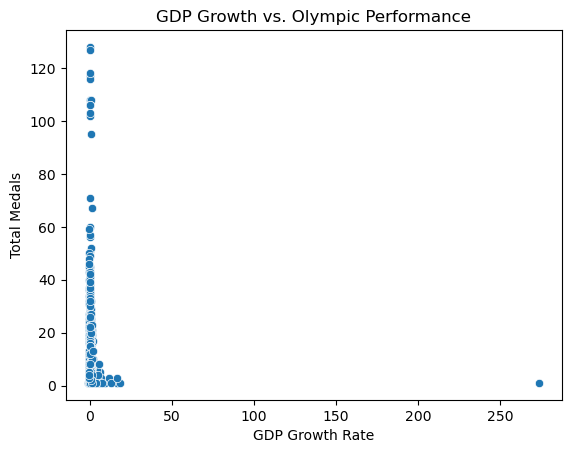

In [62]:
#What is the economic impact of hosting the Olympics on a country's subsequent Olympic performance?
import pandas as pd

# Load the datasets
olympic_medals = pd.read_csv('olympic_medals.csv')
olympic_hosts = pd.read_csv('olympic_hosts.csv')
gdp_data = pd.read_csv('gdp.csv')

# Remove the unnecessary 'Unnamed: 65' column from the GDP data
gdp_data = gdp_data.drop(columns=['Unnamed: 65'], errors='ignore')

# Clean and standardize country names if needed (add more mappings as necessary)
country_name_mapping = {
    "United States": "United States of America",
    "Russia": "Russian Federation",
    "UK": "United Kingdom",
    # Add more mappings as necessary
}

olympic_medals['country_name'] = olympic_medals['country_name'].replace(country_name_mapping)
gdp_data['Country Name'] = gdp_data['Country Name'].replace(country_name_mapping)

# Ensure the 'slug_game' in Olympic data contains only the year
olympic_medals['slug_game'] = olympic_medals['slug_game'].str.extract('(\d{4})')[0]

# Convert 'slug_game' and 'game_year' to string for merging
olympic_medals['slug_game'] = olympic_medals['slug_game'].astype(str)
olympic_hosts['game_year'] = olympic_hosts['game_year'].astype(str)

# Melt the GDP data to long format
gdp_data_melted = gdp_data.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP')
gdp_data_melted['Year'] = gdp_data_melted['Year'].astype(str)

# Merge hosts data with medals data to identify hosting years
host_performance = olympic_medals.merge(olympic_hosts[['game_year', 'game_location']], left_on='slug_game', right_on='game_year', how='left')

# Create a column to mark if the country was hosting in that year
host_performance['is_host'] = host_performance['country_name'] == host_performance['game_location']

# Find the years following hosting years for each country
host_years = host_performance[host_performance['is_host'] == True]['game_year'].astype(int).unique()
subsequent_years = (host_years + 4).astype(str)

# Filter medals data for the subsequent Olympics
subsequent_performance = olympic_medals[olympic_medals['slug_game'].isin(subsequent_years)]

# Merge with GDP data to compare economic growth
combined_data = subsequent_performance.merge(
    gdp_data_melted, 
    left_on=['country_name', 'slug_game'], 
    right_on=['Country Name', 'Year'], 
    how='left'
)

# Drop rows with missing GDP or medal data
combined_data.dropna(subset=['GDP', 'medal_type'], inplace=True)

# Group by country and year to analyze the impact
economic_impact = combined_data.groupby(['country_name', 'slug_game']).agg({
    'medal_type': 'count',
    'GDP': 'first'
}).rename(columns={'medal_type': 'total_medals'})

# Calculate GDP growth rate and compare with medal counts
economic_impact['gdp_growth'] = economic_impact.groupby(level=0)['GDP'].pct_change()

# Analyze correlation between GDP growth and medal performance
correlation = economic_impact[['total_medals', 'gdp_growth']].corr()
print("Correlation between GDP Growth and Olympic Performance:\n", correlation)

# Plot the relationship between GDP growth and medal performance
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='gdp_growth', y='total_medals', data=economic_impact)
plt.title('GDP Growth vs. Olympic Performance')
plt.xlabel('GDP Growth Rate')
plt.ylabel('Total Medals')
plt.show()




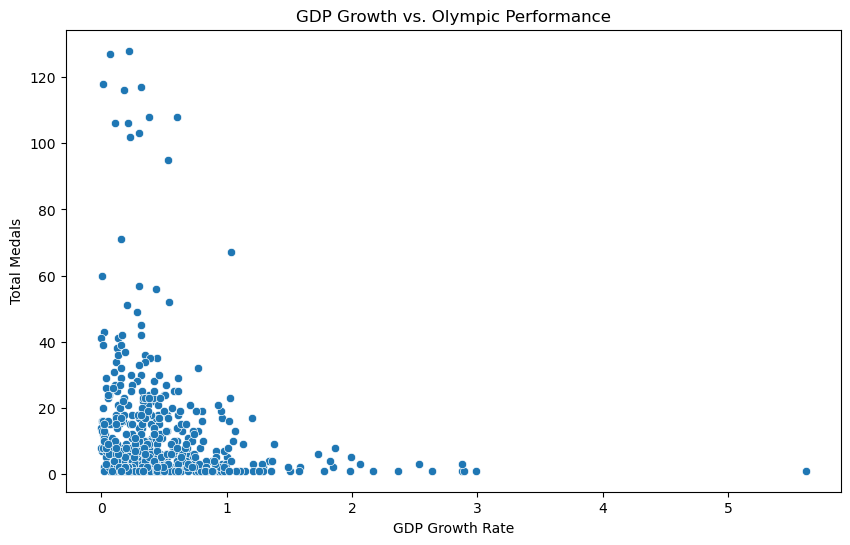

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out negative, zero, and NaN values for GDP growth
economic_impact_clean = economic_impact.dropna(subset=['gdp_growth'])
economic_impact_clean = economic_impact_clean[economic_impact_clean['gdp_growth'] > 0]

# Ensure the 'gdp_growth' is numeric
economic_impact_clean['gdp_growth'] = pd.to_numeric(economic_impact_clean['gdp_growth'], errors='coerce')

# Drop any remaining NaN values that could arise from coercion
economic_impact_clean = economic_impact_clean.dropna(subset=['gdp_growth'])

# Apply a logarithmic transformation to the GDP growth rate to manage extreme values
economic_impact_clean['log_gdp_growth'] = np.log1p(economic_impact_clean['gdp_growth'])

# Plot the relationship between log-transformed GDP growth and medal performance
plt.figure(figsize=(10, 6))  # Increase the plot size for better visibility
sns.scatterplot(x='log_gdp_growth', y='total_medals', data=economic_impact_clean)
plt.title('GDP Growth vs. Olympic Performance')
plt.xlabel('GDP Growth Rate')
plt.ylabel('Total Medals')
plt.show()

